In [6]:
import time
import numpy as np
import pandas as pd

from pybrain.structure import FeedForwardNetwork
from pybrain.structure import TanhLayer, SoftmaxLayer
from pybrain.structure import LinearLayer, SigmoidLayer, FullConnection

from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import ClassificationDataSet
from pybrain.utilities import percentError
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer


start = time.time()
data = pd.read_csv("Desktop/dataset/digit/train.csv")
features = data.iloc[:,1:].values
features = features / 255.0

targets = data.iloc[:,0].values

test_features = pd.read_csv("Desktop/dataset/digit/test.csv")
test_features = test_features.iloc[:,:].values
test_features = test_features / 255.0

targets = np.reshape(targets, (len(targets), -1))


num_input = len(features)
num_test = len(test_features)

print(num_input)
print(num_test)

# initialize a network with number of input units = number
# of pixels; two hidden units with 1000 units, and 10 output units
# default is sigmoid hidden units and linear input/ouput units
# very important to specify outclass=SoftmaxLayer
net = buildNetwork(len(features[1]),300,100,10,outclass=SoftmaxLayer)
print("number of inputs m: ",num_input)

# initialize two classification data sets, one for training
# and cross-validation purposes, the other for the test data
# default parameter 'target' in method ClassificationDataSet
# is '1'
DS = ClassificationDataSet(len(features[1]),nb_classes=10)
test_DS = ClassificationDataSet(len(features[1]),nb_classes=10)

print("Ist st Done")

6000
50
number of inputs m:  6000
Ist st Done


In [7]:
print("Dataset build successfully")

i = 0
# as written, the follwing 3 lines feed only the first
# 10000 training cases into the NN for training, for speed
# and demonstration purposes. For real training, use 
# while i < num_input:
while i < num_input:
    DS.appendLinked(features[i], targets[i])
    i+=1
    
i = 0

# as written, the following 3 lines predict only the first
# 50 test cases, for the sake of speed and demonstration
while i < num_test:
    test_DS.appendLinked(test_features[i], 0)
    i+=1

# split up the classification data set 'DS' into training
# and cross-validation sets
cvdata_temp, trndata_temp = DS.splitWithProportion(0.2)

print(cvdata_temp['input'].shape)
print(cvdata_temp['target'].shape)

cvdata = ClassificationDataSet(len(features[1]),nb_classes=10)
cvdata.setField('input', cvdata_temp['input'])
cvdata.setField('target', cvdata_temp['target'])


trndata = ClassificationDataSet(len(features[1]),nb_classes=10)
trndata.setField('input', trndata_temp['input'])
trndata.setField('target', trndata_temp['target'])


DS._convertToOneOfMany(bounds=[0,1])
test_DS._convertToOneOfMany(bounds=[0,1])
cvdata._convertToOneOfMany(bounds=[0,1])
trndata._convertToOneOfMany(bounds=[0,1])

print(len(cvdata))
print(len(trndata))
print("2nd nd done")


Dataset build successfully
(1200, 784)
(1200, 1)
1200
4800
2nd nd done


In [8]:

trainer = BackpropTrainer(net, dataset=trndata,momentum=0.1,verbose=True, weightdecay=0.01,learningrate=0.001)
# train the NN 1000 separate times, printing out train and CV errors
# each time
i =0
while i < 25:
    # specify the number of epochs
    trainer.trainEpochs(1)
    trnresults = percentError(trainer.testOnClassData(),trndata['class'])
    cvresults = percentError(trainer.testOnClassData(dataset = cvdata), cvdata['class'])

    print ("epoch: %4d" % trainer.totalepochs, \
        " train error: %5.2f%%" %trnresults, \
        " CV error: %5.2f%%" % cvresults)
    
    i+=1

i = 0.

# feed test data set into NN and print the results to screen
out = net.activateOnDataset(test_DS)
out = out.argmax(axis=1) 


Total error:  0.0578699325744
epoch:    1  train error: 67.46%  CV error: 68.08%
Total error:  0.0406122422108
epoch:    2  train error: 51.90%  CV error: 57.33%
Total error:  0.0323400457391
epoch:    3  train error: 42.58%  CV error: 48.42%
Total error:  0.0268349804388
epoch:    4  train error: 35.42%  CV error: 41.75%
Total error:  0.0230452580443
epoch:    5  train error: 30.48%  CV error: 35.25%
Total error:  0.0203764064266
epoch:    6  train error: 26.98%  CV error: 31.67%
Total error:  0.0183035255406
epoch:    7  train error: 23.33%  CV error: 28.17%
Total error:  0.0165704181436
epoch:    8  train error: 21.02%  CV error: 24.83%
Total error:  0.0152314035947
epoch:    9  train error: 18.85%  CV error: 23.67%
Total error:  0.014159814793
epoch:   10  train error: 17.44%  CV error: 21.83%
Total error:  0.0133015915399
epoch:   11  train error: 15.60%  CV error: 20.17%
Total error:  0.0125999539559
epoch:   12  train error: 14.85%  CV error: 18.42%
Total error:  0.0120564637308

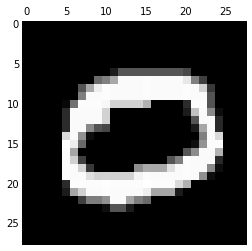

[2 0 4 9 3 7 0 3 0 3 5 7 9 0 4 3 6 1 9 0 9 1 1 5 7 4 2 7 7 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 2 6 1]
3839.702442884445


In [34]:
print("predicted digits: ")
np.savetxt('Desktop/dataset/digit/while_showing_mentor.csv', np.c_[range(1,len(out)+1),out], delimiter=',', header = 'ImageId,Label',
           comments = '', fmt='%d')



import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

img = test_features[1]
pl.gray()
pl.matshow(np.reshape(img,(28,28)))
pl.show()

out = net.activateOnDataset(test_DS)
out = out.argmax(axis=1)
print(out)

end = time.time()
print(end-start)